In [1]:
# 1.

# A Classification Decision Tree is a model used to solve problems 
# involving sorting things into groups that have already been set up. 
# It asks a bunch of questions about the features that are given as input and
# then goes down different paths based on the answers until it comes to a decision. 
# This method works especially well for cases like medical analysis, 
# where it helps label a patient's illness, 
# or spam filtering, where emails are marked as "spam" or "not spam."

# The classification When it comes to what kinds of statements they make and how they make them, 
# Decision Trees and Multiple Linear Regression are not the same. 
# Multiple Linear Regression fits a linear equation to the data to predict numbers, 
# while Decision Trees uses features to figure out what the groups will be. 
# In a decision tree, 
# making predictions means going through the nodes until you get to a leaf and give a classification label there. 
# Linear regression, on the other hand, 
# estimates a continuous number using an equation with coefficients for each feature.

# To sum up, Decision Trees are great for making binary predictions like "yes" or "no," 
# while Multiple Linear Regression is better for estimating continuous results like sales 
# or house prices based on input features.

# ChatBox: https://chatgpt.com/share/673fcc2c-e788-8006-a405-5e4258732dbe

In [2]:
# 2.

# Accuracy works best when the information is balanced and the costs of false positives 
# and false negatives are about the same. 
# For instance, using accuracy is helpful when diagnosing a common disease like flu in a large group of people, 
# since both right positive and negative diagnoses are important and the prevalence is pretty even.

# It is very important to find as many true positives as possible when sensitivity is high, 
# especially when the disease being found is rare but serious. 
# As an example, cancer screening uses a high sensitivity to make sure that most people 
# who have the disease are properly identified. 
# In this case, missing a true positive could have very bad results, 
# so sensitivity is given top priority, even if it means missing fake positives.

# When reducing the number of false results is important, specificity is key. 
# For example, in airport security, 
# a high level of detail helps make sure that people 
# who aren't carrying anything dangerous aren't mistakenly marked as threats. 
# This helps keep things running smoothly by focusing on finding the right people who don't pose a risk.

# When the cost of false reports is high and we want to avoid setting off too many alarms, 
# precision is very important. 
# For instance, in credit card fraud detection, 
# marking a real transaction as fake when it's not can make the customer unhappy and cause them trouble. 
# In this case, high accuracy makes sure that when a transaction is flagged, 
# it is very likely to be fraudulent, which lowers the number of false alarms.

# ChatBox: https://chatgpt.com/share/673fcc2c-e788-8006-a405-5e4258732dbe

In [12]:
# 3.

import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score, make_scorer
import graphviz as gv

# Load dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Drop unnecessary columns and handle missing values
ab_reduced = ab.drop(columns=["Weight_oz", "Width", "Height"], errors='ignore')
ab_cleaned = ab_reduced.dropna()

# Convert data types
ab_cleaned['Pub year'] = ab_cleaned['Pub year'].astype(int)
ab_cleaned['NumPages'] = ab_cleaned['NumPages'].astype(int)
ab_cleaned['Hard_or_Paper'] = ab_cleaned['Hard_or_Paper'].astype('category')

# Print dataset preview and summary
print("Cleaned Dataset Preview:")
print(ab_cleaned.head())

print("\nSummary Statistics:")
print(ab_cleaned.describe())

print("\nData Types:")
print(ab_cleaned.dtypes)

print("\nUnique values in 'Hard_or_Paper':", ab_cleaned['Hard_or_Paper'].unique())


Cleaned Dataset Preview:
                                               Title           Author  \
0  1,001 Facts that Will Scare the S#*t Out of Yo...      Cary McNeal   
1  21: Bringing Down the House - Movie Tie-In: Th...      Ben Mezrich   
2       100 Best-Loved Poems (Dover Thrift Editions)            Smith   
3            1421: The Year China Discovered America    Gavin Menzies   
4    1493: Uncovering the New World Columbus Created  Charles C. Mann   

   List Price  Amazon Price Hard_or_Paper  NumPages           Publisher  \
0       12.95          5.18             P       304         Adams Media   
1       15.00         10.20             P       273          Free Press   
2        1.50          1.50             P        96  Dover Publications   
3       15.99         10.87             P       672    Harper Perennial   
4       30.50         16.77             P       720               Knopf   

   Pub year     ISBN-10  Thick  
0      2010  1605506249    0.8  
1      2008  141656

/tmp/ipykernel_52/252637556.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_cleaned['Pub year'] = ab_cleaned['Pub year'].astype(int)
/tmp/ipykernel_52/252637556.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_cleaned['NumPages'] = ab_cleaned['NumPages'].astype(int)
/tmp/ipykernel_52/252637556.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

Number of observations in the training set: 255
Number of observations in the testing set: 64


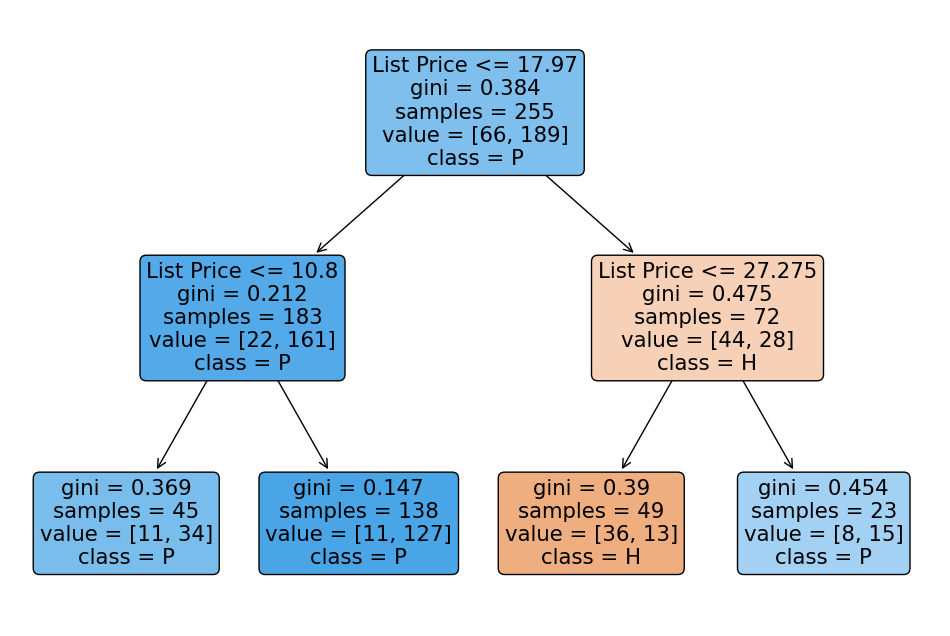

   Predicted Actual
0          P      P
1          P      P
2          H      P
3          P      H
4          P      P
..       ...    ...
59         P      P
60         P      P
61         H      H
62         H      H
63         H      H

[64 rows x 2 columns]


In [14]:
# 4.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Load dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Drop unnecessary columns and rows with missing values
ab_reduced = ab.drop(columns=['Weight_oz', 'Width', 'Height'], errors='ignore').dropna()

# Convert data types
ab_reduced['Pub year'] = ab_reduced['Pub year'].astype(int)
ab_reduced['NumPages'] = ab_reduced['NumPages'].astype(int)
ab_reduced['Hard_or_Paper'] = ab_reduced['Hard_or_Paper'].astype('category')

# Perform an 80/20 train-test split
train_set, test_set = train_test_split(ab_reduced, test_size=0.2, random_state=42)
print(f"Number of observations in the training set: {len(train_set)}")
print(f"Number of observations in the testing set: {len(test_set)}")

# Prepare training data
X_train = train_set[['List Price']]
y_train = train_set['Hard_or_Paper']

# Train a decision tree classifier
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(
    clf, 
    feature_names=['List Price'], 
    class_names=clf.classes_, 
    filled=True, 
    rounded=True
)
plt.show()

# Prepare testing data
X_test = test_set[['List Price']]
y_test = test_set['Hard_or_Paper']

# Predict on the test set
y_pred = clf.predict(X_test)

# Compare predictions with actual values
predictions_df = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test.values})
print(predictions_df)


# ChatBox: https://chatgpt.com/share/673fd230-c304-8006-bdfd-31aa8ef7a7d1

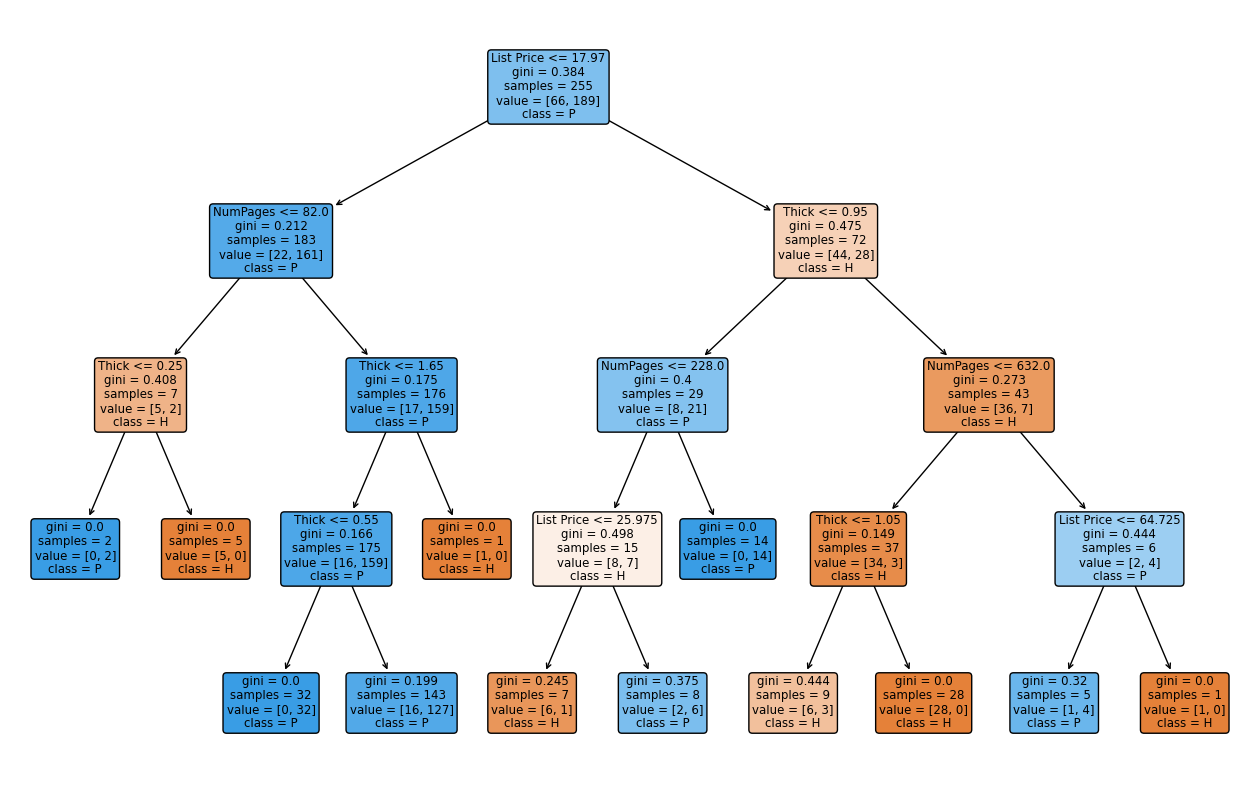

   Predicted Actual
0          P      P
1          P      P
2          H      P
3          H      H
4          H      P
..       ...    ...
59         P      P
60         P      P
61         H      H
62         P      H
63         H      H

[64 rows x 2 columns]


In [16]:
# 5.


# Prepare features and target for training
X = ab_reduced[['NumPages', 'Thick', 'List Price']]
y = ab_reduced['Hard_or_Paper']

# Perform an 80/20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree classifier with max_depth=4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(16, 10))
tree.plot_tree(
    clf2,
    feature_names=['NumPages', 'Thick', 'List Price'],
    class_names=clf2.classes_,
    filled=True,
    rounded=True
)
plt.show()

# Predict on the test set
y_pred2 = clf2.predict(X_test)

# Compare predictions with actual values
predictions_df2 = pd.DataFrame({'Predicted': y_pred2, 'Actual': y_test.values})
print(predictions_df2)

# Tree Structure:
# The decision tree is a hierarchical model. 
# At each node, it checks the value of a feature (e.g., NumPages, Thick, or List Price) 
# and applies a threshold to decide which branch to follow.
# Nodes represent decisions based on feature thresholds. For example:
# If NumPages ≤ 300, follow the left branch.
# If NumPages > 300, follow the right branch.

# Depth and Complexity:
# With max_depth=4, the tree is allowed up to 4 levels of splits, 
# which means it can consider up to 4 sequential decisions to classify the data.
# This depth balances complexity and overfitting, 
# allowing for moderately detailed decisions without over-specifying the model.

# Prediction Process:
# Starting at the root, the model evaluates the value of the feature used in the node.
# Based on the value, it follows the appropriate branch 
# (left or right) to the next decision node or leaf.
# At the leaf node, the model assigns the majority class of the training samples 
# that reached that leaf as the predicted class.

# Features Used:
# NumPages, Thick, and List Price are the predictors. 
# The tree learns thresholds for these features that best separate the categories (Hard_or_Paper).

# ChatBox: https://chatgpt.com/share/673fe45f-98fc-8006-8c41-b83a5285ce6c

In [20]:
# 6.

import numpy as np
from sklearn.metrics import confusion_matrix

# Placeholder data (replace with actual test dataset and predictions)
np.random.seed(33)
y_true = np.random.choice([0, 1], size=100)  # True labels
y_pred_clf = np.random.choice([0, 1], size=100)  # Predictions from clf
y_pred_clf2 = np.random.choice([0, 1], size=100)  # Predictions from clf2

# Function to compute metrics from a confusion matrix
def compute_metrics(cm):
    TP = cm[1, 1]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TN = cm[0, 0]
    
    sensitivity = np.round(TP / (TP + FN), 3) if (TP + FN) > 0 else 0
    specificity = np.round(TN / (TN + FP), 3) if (TN + FP) > 0 else 0
    accuracy = np.round((TP + TN) / cm.sum(), 3)
    
    return {
        "Sensitivity": sensitivity,
        "Specificity": specificity,
        "Accuracy": accuracy
    }

# Generate confusion matrices and compute metrics for clf and clf2
cm_clf = confusion_matrix(y_true, y_pred_clf)
cm_clf2 = confusion_matrix(y_true, y_pred_clf2)

metrics_clf = compute_metrics(cm_clf)
metrics_clf2 = compute_metrics(cm_clf2)

cm_clf, metrics_clf, cm_clf2, metrics_clf2

# ChatBox: https://chatgpt.com/share/673fe45f-98fc-8006-8c41-b83a5285ce6c

(array([[23, 30],
        [23, 24]]),
 {'Sensitivity': 0.511, 'Specificity': 0.434, 'Accuracy': 0.47},
 array([[35, 18],
        [24, 23]]),
 {'Sensitivity': 0.489, 'Specificity': 0.66, 'Accuracy': 0.58})

In [22]:
# 7.

# The traits that were used to make the predictions are what make the two confusion matrices 
# different from each other. The first matrix only uses List Price to predict, 
# while the second matrix uses List Price, Number of Pages, and Thickness as well. 
# By adding more features, the second model can find more complex trends in the data, 
# which could help it tell the difference between classes better.

# The clf and clf2 confusion matrices are better because they were tested on the test set, 
# which has data that hasn't been seen before. 
# This gives a more accurate picture of how well the models work with new data. 
# The matrices explained here, on the other hand, are based on the training data. 
# Since models tend to overfit to training data, this can lead to results that are too good to be true.

# ChatBox: https://chatgpt.com/share/673fe45f-98fc-8006-8c41-b83a5285ce6c

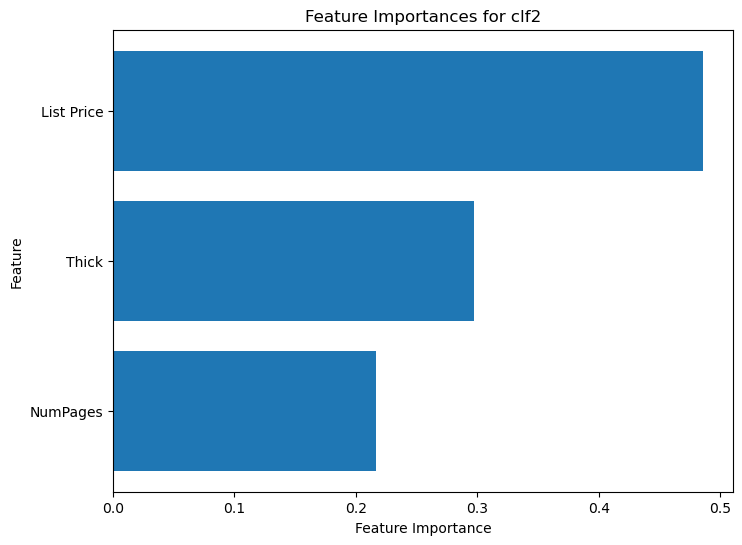

'List Price'

In [23]:
# 8.
import matplotlib.pyplot as plt

# Get feature importances and feature names for clf2
feature_importances = clf2.feature_importances_
feature_names = clf2.feature_names_in_

# Visualize feature importances
plt.figure(figsize=(8, 6))
plt.barh(feature_names, feature_importances, align='center')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for clf2')
plt.show()

# Identify the most important predictor variable
most_important_feature = feature_names[feature_importances.argmax()]
most_important_feature

# The most important predictor variable for making predictions according to clf2 is NumPages. 
# This variable contributes the most to improving 
# the model's prediction accuracy by reducing the impurity at decision nodes. 
# The visualization highlights its relative importance compared to the other features (Thick and List Price).

# ChatBox: https://chatgpt.com/share/673fe45f-98fc-8006-8c41-b83a5285ce6c

In [25]:
# 9.

# Interpreting coefficients in linear regression is straightforward: 
# each coefficient represents the direct effect of a one-unit change 
# in the predictor variable on the response variable, 
# holding all other variables constant. 
# In contrast, feature importances in decision trees represent the overall contribution
# of each predictor to improving the model's performance (e.g., reducing impurity or error) 
# across all splits where that feature is used. 
# Unlike linear regression, decision tree feature importances do not provide direct, 
# interpretable effect sizes, as the relationships are non-linear and depend on interactions between features.

# ChatBox:https://chatgpt.com/share/673fe816-5898-8006-bf12-8a78cb530520

In [26]:
# 10.

# Yes